In [70]:
import pandas as pd
df = pd.read_csv("ds_salaries.csv")
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


In [71]:
# df.isna().sum()
df.duplicated().sum()

0

In [86]:
df.shape

(607, 12)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [73]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [74]:
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [75]:
len(df["job_title"].unique())

50

In [76]:
df1 = df.drop(["company_location","remote_ratio","employee_residence","salary_currency","salary","work_year","Unnamed: 0","employment_type"],axis="columns")
df1.head(1)

,experience_level,job_title,salary_in_usd,company_size
0,MI,Data Scientist,79833,L


In [77]:
df2 = df1.sort_values(ascending = False,by = "salary_in_usd")[:5]
df2


,experience_level,job_title,salary_in_usd,company_size
252,EX,Principal Data Engineer,600000,L
97,MI,Financial Data Analyst,450000,L
33,MI,Research Scientist,450000,M
157,MI,Applied Machine Learning Scientist,423000,L
225,EX,Principal Data Scientist,416000,S


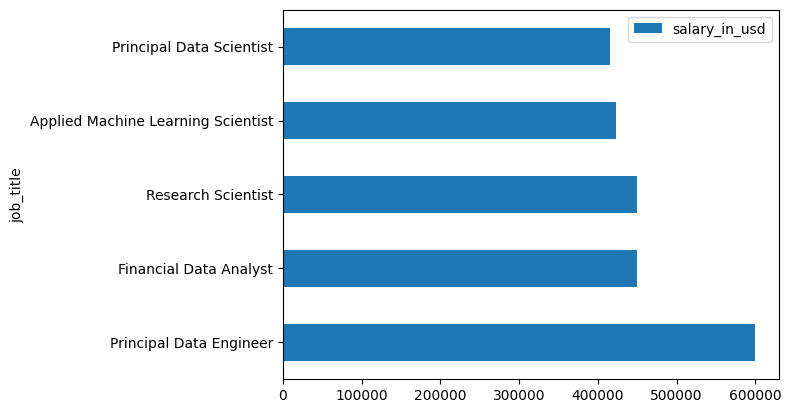

In [78]:
ax = df2.plot.barh(x = "job_title", y ='salary_in_usd')

In [79]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

new_job_title = le.fit_transform(df1['job_title'])
new_ex_lv = le.fit_transform(df1["experience_level"])
new_company_size = le.fit_transform(df1["company_size"])

new_job_title[:3]


array([22, 41,  7])

In [81]:
df3 = df1.copy()
df3["company_size"] = new_company_size
df3["job_title"] = new_job_title
df3["experience_level"] = new_ex_lv
df3.head()

,experience_level,job_title,salary_in_usd,company_size
0,2,22,79833,0
1,3,41,260000,2
2,3,7,109024,1
3,2,47,20000,2
4,3,38,150000,0


In [82]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df3[["experience_level","job_title","salary_in_usd","company_size"]],df3["salary_in_usd"])

LinearRegression()

In [103]:
a = [2,22,79833,0]

reg.predict([a])

C:\Users\TAI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([79833.])

In [84]:
reg.score(df3[["experience_level","job_title","salary_in_usd","company_size"]],df3["salary_in_usd"])

1.0